In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn import tree

In [2]:
df = pd.read_csv("F:\Machine Learning\Datasets\heart_failure.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT'>

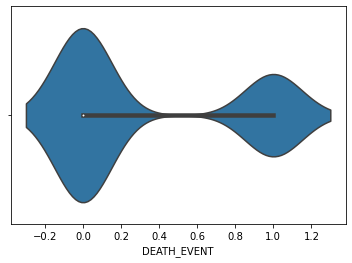

In [5]:
sns.violinplot(x="DEATH_EVENT", data = df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

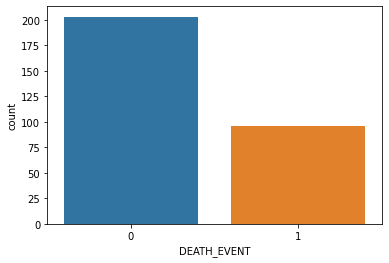

In [6]:
sns.countplot(x="DEATH_EVENT", data = df)

{'bodies': [<matplotlib.collections.PolyCollection at 0x2280f0517c0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2280f0515e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2280f051640>,
 'cbars': <matplotlib.collections.LineCollection at 0x2280f051bb0>}

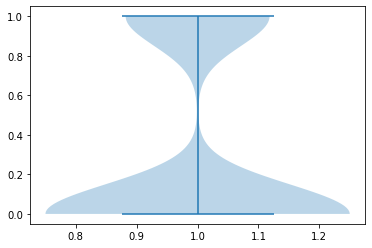

In [7]:
# Initialize Figure and Axes object
fig, ax = plt.subplots()
ax.violinplot(df["DEATH_EVENT"])

In [8]:
df.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

<AxesSubplot:xlabel='smoking', ylabel='count'>

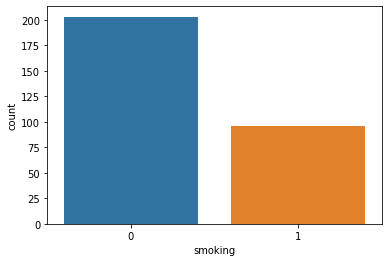

In [9]:
sns.countplot(x="smoking", data = df)

<AxesSubplot:xlabel='smoking', ylabel='count'>

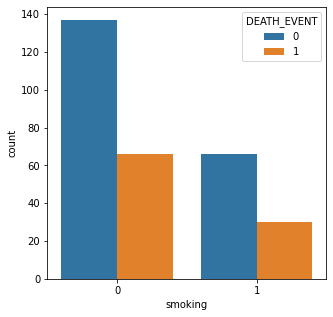

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(x="smoking", hue="DEATH_EVENT", data = df)

In [11]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [12]:
x = df.drop("DEATH_EVENT", axis=1)

In [13]:
y = df["DEATH_EVENT"]

In [14]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = .70, random_state=2)

In [17]:
dtc = DecisionTreeClassifier()

In [18]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [19]:
ypred = dtc.predict(xtest)

In [20]:
ytest.head()

179    0
221    0
226    0
7      1
173    0
Name: DEATH_EVENT, dtype: int64

In [21]:
dtc.score(xtest, ytest)

0.8

In [22]:
from sklearn import tree
plt.figure(figsize=(40,40))
#tree.plot_tree(dtc,filled = True)

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

In [23]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        66
           1       0.60      0.75      0.67        24

    accuracy                           0.80        90
   macro avg       0.75      0.78      0.76        90
weighted avg       0.82      0.80      0.81        90



In [24]:
cm = confusion_matrix(ytest, ypred)
cm

array([[54, 12],
       [ 6, 18]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

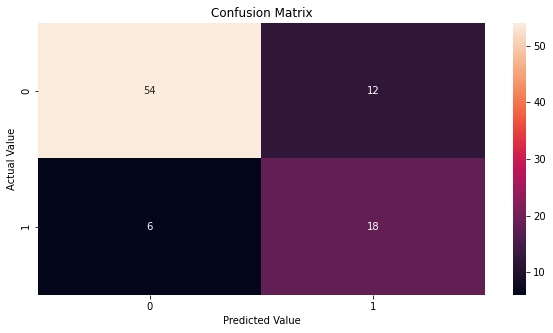

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix")


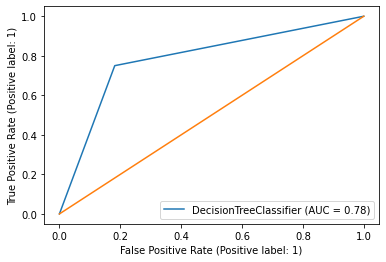

In [26]:
plot_roc_curve(dtc,xtest, ytest)
plt.plot([0,1],[0,1])

[Text(362.70000000000005, 516.4200000000001, 'X[11] <= 67.5\ngini = 0.452\nsamples = 209\nvalue = [137, 72]'),
 Text(120.9, 462.06000000000006, 'X[4] <= 72.5\ngini = 0.26\nsamples = 52\nvalue = [8, 44]'),
 Text(102.30000000000001, 407.70000000000005, 'X[2] <= 109.5\ngini = 0.237\nsamples = 51\nvalue = [7, 44]'),
 Text(55.800000000000004, 353.34000000000003, 'X[4] <= 37.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(37.2, 298.98, 'X[4] <= 25.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(18.6, 244.62, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(55.800000000000004, 244.62, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(74.4, 298.98, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(148.8, 353.34000000000003, 'X[7] <= 0.7\ngini = 0.169\nsamples = 43\nvalue = [4, 39]'),
 Text(111.60000000000001, 298.98, 'X[5] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(93.0, 244.62, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(130.20000000000002, 244.62, 'gini = 0.0

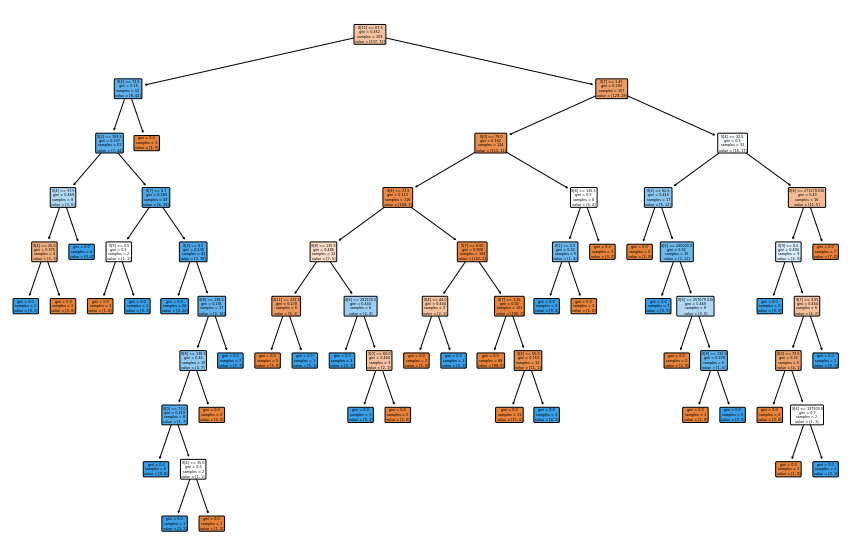

In [27]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc, filled=True, rounded = True)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rdt = RandomForestClassifier(n_estimators = 75)

In [30]:
rdt.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=75)

In [31]:
rdt.score(xtest, ytest)

0.9111111111111111

In [32]:
ypred01 = dtc.predict(xtest)

In [33]:
print(classification_report(ytest, ypred01))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        66
           1       0.60      0.75      0.67        24

    accuracy                           0.80        90
   macro avg       0.75      0.78      0.76        90
weighted avg       0.82      0.80      0.81        90



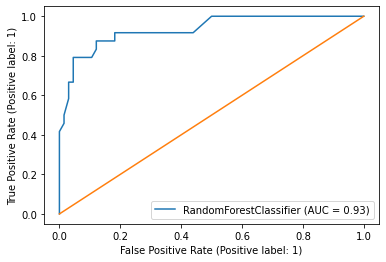

In [34]:
plot_roc_curve(rdt,xtest, ytest)
plt.plot([0,1],[0,1])